<br><br><br>

#Work in Progress

In [2]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
stations = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/station.csv')
trips = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/trip.csv', error_bad_lines=False)

weathers = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/weather.csv')

stations.head(5)


Skipping line 50794: expected 12 fields, saw 20



,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [ ]:
import matplotlib.pyplot as plt

trips.gender

from collections import defaultdict

# count genders
counts = defaultdict(int)
for e in trips.gender:
    counts[e] += 1

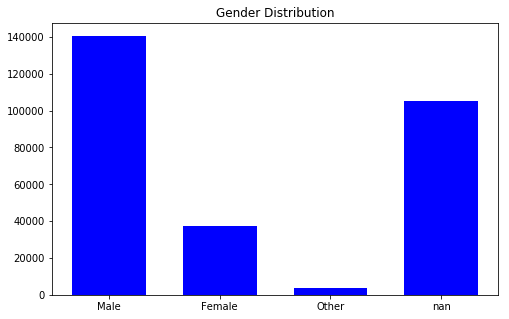

In [8]:
# Gender distribution
y = [e[1] for e in counts.items()][:4]
x = range(len(y))
cols = [e[0] for e in counts.items()][:4]
    
plt.figure(figsize=(8,5))
plt.bar(x, y, color='blue', width=1/1.5)
plt.xticks(x, cols)
plt.title('Gender Distribution')
plt.show()

In [9]:
# Bikes with trip duration

#print(trips.birthyear)

bike_stats = defaultdict(int)
dur_stats = defaultdict(float)
by_stats = defaultdict(int)

for t in trips.itertuples():
    bike_stats[t.bikeid] += 1
    dur_stats[t.bikeid] += t.tripduration
    by_stats[str(t.birthyear)] += 1
    #break
    
#for bid in dur_stats.keys():
#    dur_stats[bid] /= bike_stats[bid]
    
    
#for e, k in zip(dur_stats, bike_stats):
    #print(dur_stats[k], " ", bike_stats[e])
    
print(len(by_stats.keys()))
#print(by_stats)

62


1931 1999


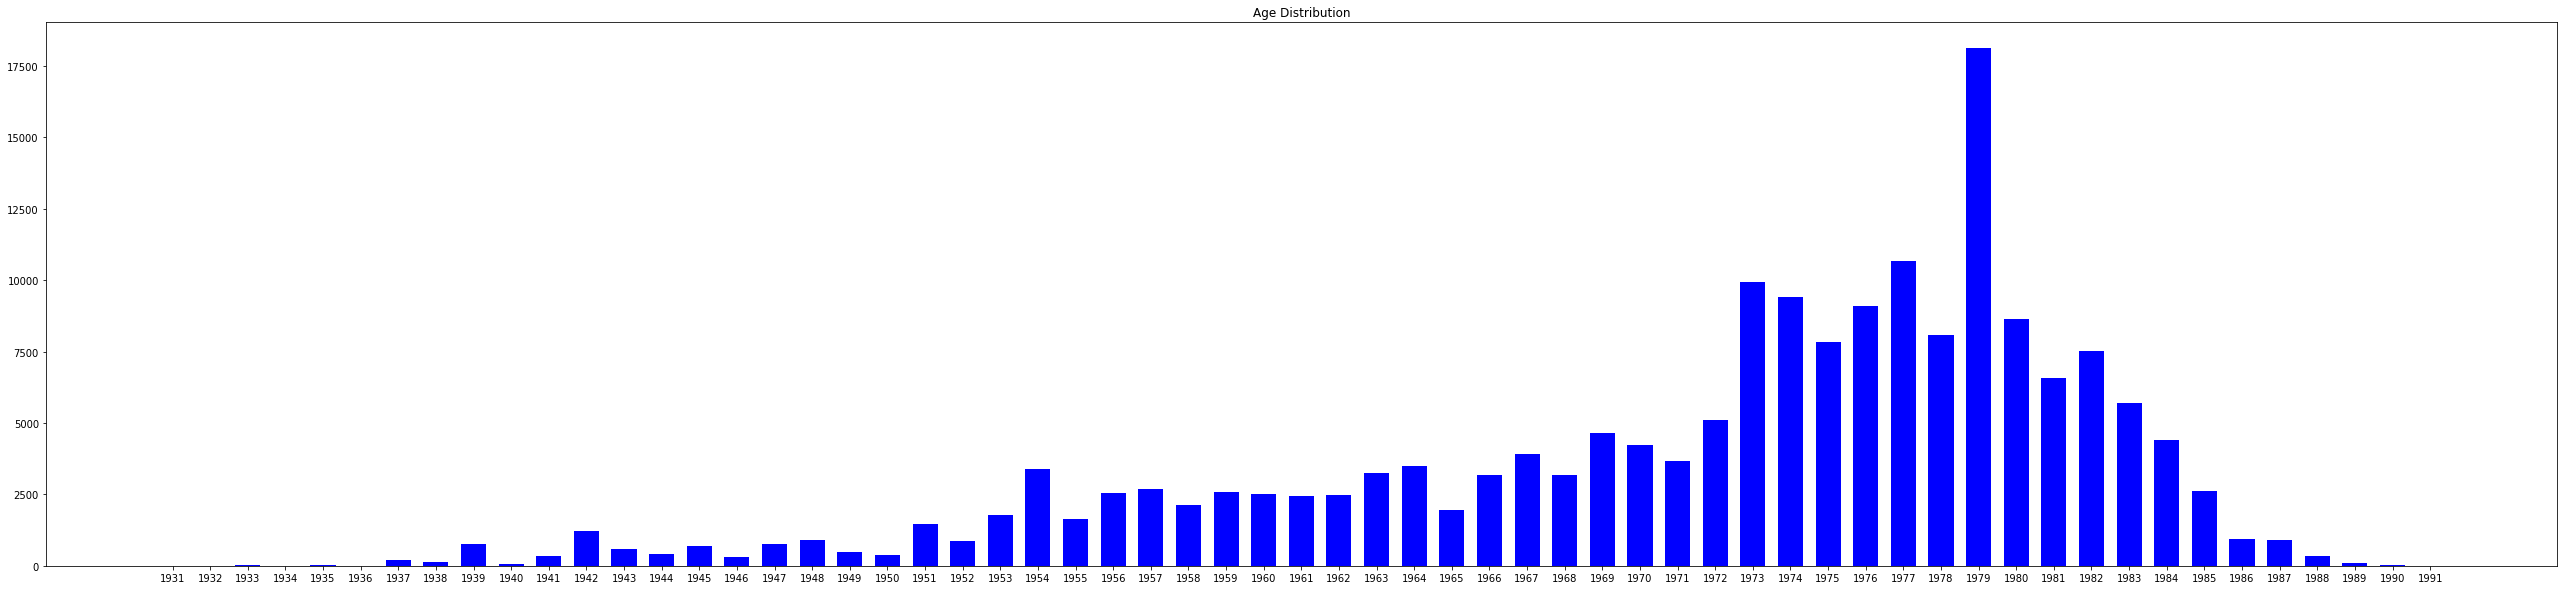

In [11]:
keys = sorted(by_stats.keys())[:-1] # without nan


# Age distribution

y = [by_stats[k] for k in keys]

cols = [by_stats[k] for k in keys]
    
    
minyear = int(min(keys)[:-2])
maxyear = int(max(keys)[:-2])
print(minyear, maxyear)
minamp=0
maxamp=40

x = range(minyear, maxyear, 50)
x = range(minyear, maxyear)

x = x[:61]

# evalutate with histogram
plt.figure(figsize=(45,10))
plt.bar(x, y, color='blue', width=1/1.5)
#plt.hist(cols, 10)
plt.xticks(x, [e for e in x])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Age Distribution')
plt.show()

In [26]:
trips.describe()

,trip_id,tripduration,birthyear
count,286858.000000,286858.000000,181554.000000
mean,112431.781746,1178.354284,1979.759107
std,76565.086482,2038.697070,10.167110
min,431.000000,60.008000,1931.000000
25%,43051.000000,387.925750,1974.000000
50%,103486.500000,624.846500,1983.000000
75%,179544.750000,1118.483250,1987.000000
max,255245.000000,28794.398000,1999.000000


In [28]:
stations.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328207,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [29]:
weathers .describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
count,689.000000,688.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,689.000000
mean,64.027576,56.584302,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,0.105065
std,12.427843,10.408058,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,0.235644
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,0.090000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,2.200000


In [31]:
#Data Manipulation on Trips Datase
trips.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [33]:
# lets drop the id columns that that are unnecessary

trips.drop(['trip_id','bikeid'], axis = 1,   inplace = True) # This command drop off the columns we pass as argument, the axis=1 condition,
#makes the drop on columns, the inplace = True, save the alteration on the dat

In [34]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
starttime            286858 non-null object
stoptime             286858 non-null object
tripduration         286858 non-null float64
from_station_name    286858 non-null object
to_station_name      286858 non-null object
from_station_id      286858 non-null object
to_station_id        286858 non-null object
usertype             286858 non-null object
gender               181558 non-null object
birthyear            181554 non-null float64
dtypes: float64(2), object(8)
memory usage: 21.9+ MB


In [35]:
# Tranforming the starttime column

data = trips['starttime']

In [37]:
dta = list(trips['starttime']) # transforms each element of the startime column into a string
dta = pd.to_datetime(dta)  # In the format of string, each element of the list is transformed into date by the pandas
trips['starttime'] = dta # Saving column changes

In [38]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
starttime            286858 non-null datetime64[ns]
stoptime             286858 non-null object
tripduration         286858 non-null float64
from_station_name    286858 non-null object
to_station_name      286858 non-null object
from_station_id      286858 non-null object
to_station_id        286858 non-null object
usertype             286858 non-null object
gender               181558 non-null object
birthyear            181554 non-null float64
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 21.9+ MB


In [39]:
trips.starttime

0        2014-10-13 10:31:00
1        2014-10-13 10:32:00
2        2014-10-13 10:33:00
3        2014-10-13 10:34:00
4        2014-10-13 10:34:00
5        2014-10-13 10:34:00
6        2014-10-13 11:35:00
7        2014-10-13 11:35:00
8        2014-10-13 11:35:00
9        2014-10-13 11:35:00
10       2014-10-13 11:36:00
11       2014-10-13 11:37:00
12       2014-10-13 11:37:00
13       2014-10-13 11:37:00
14       2014-10-13 11:37:00
15       2014-10-13 11:37:00
16       2014-10-13 11:37:00
17       2014-10-13 11:37:00
18       2014-10-13 11:40:00
19       2014-10-13 11:41:00
20       2014-10-13 11:41:00
21       2014-10-13 11:41:00
22       2014-10-13 11:42:00
23       2014-10-13 11:43:00
24       2014-10-13 11:43:00
25       2014-10-13 11:43:00
26       2014-10-13 11:43:00
27       2014-10-13 11:43:00
28       2014-10-13 11:43:00
29       2014-10-13 11:44:00
                 ...        
286828   2016-08-31 20:13:00
286829   2016-08-31 20:32:00
286830   2016-08-31 20:32:00
286831   2016-

In [40]:
trips.head()

,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,2014-10-13 10:31:00,10/13/2014 10:48,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,2014-10-13 10:32:00,10/13/2014 10:48,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,2014-10-13 10:33:00,10/13/2014 10:48,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,2014-10-13 10:34:00,10/13/2014 10:48,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,2014-10-13 10:34:00,10/13/2014 10:49,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [41]:
# in fact we just need the starttime column, since we already have the variable duration of the trip

trips.drop(columns='stoptime', axis = 1, inplace=True)

In [42]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 9 columns):
starttime            286858 non-null datetime64[ns]
tripduration         286858 non-null float64
from_station_name    286858 non-null object
to_station_name      286858 non-null object
from_station_id      286858 non-null object
to_station_id        286858 non-null object
usertype             286858 non-null object
gender               181558 non-null object
birthyear            181554 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 19.7+ MB


In [43]:
#Now, it would be a good idea to find out the age of the users once we have their date of birth.
trips.isnull().sum()

starttime                 0
tripduration              0
from_station_name         0
to_station_name           0
from_station_id           0
to_station_id             0
usertype                  0
gender               105300
birthyear            105304
dtype: int64

In [44]:
trips.birthyear.describe()

count    181554.000000
mean       1979.759107
std          10.167110
min        1931.000000
25%        1974.000000
50%        1983.000000
75%        1987.000000
max        1999.000000
Name: birthyear, dtype: float64

In [45]:
# Filling in the missing values with values between 1969 and 1989 (which is the range in which most of the data is).
trips.birthyear.fillna(value = np.random.randint(1969,1989), inplace=True)

In [46]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 9 columns):
starttime            286858 non-null datetime64[ns]
tripduration         286858 non-null float64
from_station_name    286858 non-null object
to_station_name      286858 non-null object
from_station_id      286858 non-null object
to_station_id        286858 non-null object
usertype             286858 non-null object
gender               181558 non-null object
birthyear            286858 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 19.7+ MB


In [47]:
trips.birthyear.describe()

count    286858.000000
mean       1981.315916
std           8.342781
min        1931.000000
25%        1981.000000
50%        1984.000000
75%        1985.000000
max        1999.000000
Name: birthyear, dtype: float64

In [48]:
year = trips.starttime

def age(year):
    '''This function extracts the year from each element of the starttime column' '''
    age = []
    for i in year.index:  # get each element in the index of the variable 'year'
        a = str(year[i])  # 'i' represents each element of the index of the variable 'year', so each time 'for' identifies a
        # number in the index it plays within the variable 'a' that selects an item from the variable 'year' 
        b = a.split('-')[0] # variable 'b', stores the result of the .split () method applied on variable 'a', in
        # Then I extract the first element of the result from .split (), which is the year
        c = pd.to_numeric(b)  # converts the string year, to number
        

        age.append(c.astype(int)) # stores 'c' in the 'age' list, created at the beginning of the function
    return age

In [49]:
# usando a função e armazenando o resultado em uma variável
aged = age(year)

In [51]:
trips['age'] = aged - trips.birthyear
trips['age'] = trips['age'].astype(int)

In [52]:
trips.columns

Index(['starttime', 'tripduration', 'from_station_name', 'to_station_name',
       'from_station_id', 'to_station_id', 'usertype', 'gender', 'birthyear',
       'age'],
      dtype='object')

In [53]:
trips.head()

,starttime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age
0,2014-10-13 10:31:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54
1,2014-10-13 10:32:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44
2,2014-10-13 10:33:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26
3,2014-10-13 10:34:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,37
4,2014-10-13 10:34:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,43


In [54]:
# Populating missing values from the gender column
trips.gender.value_counts()

Male      140565
Female     37562
Other       3431
Name: gender, dtype: int64

In [55]:
trips.gender.isnull().sum()

105300

In [56]:
# Using the fillna method with the 'ffill' parameter to populate the null values ​​with the next valid observation of the dataset
gender = trips.gender.fillna(method='ffill')
trips.gender = gender
trips.gender.isnull().sum()

0

In [57]:
trips.head()

,starttime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age
0,2014-10-13 10:31:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,54
1,2014-10-13 10:32:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,44
2,2014-10-13 10:33:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,26
3,2014-10-13 10:34:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,37
4,2014-10-13 10:34:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,43


In [59]:
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [61]:
# creating the 'from_station_id' and 'to_station_id' columns in the dataset station

stations['from_station_id'] = stations.station_id
stations['to_station_id'] = stations.station_id
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,from_station_id,to_station_id
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN,BT-01,BT-01
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN,BT-03,BT-03
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN,BT-04,BT-04
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN,BT-05,BT-05
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN,CBD-03,CBD-03


In [62]:
# creating another dataset, only with the 'from_station_id' column and the location data
from_stations = stations[['lat', 'long','from_station_id']]
from_stations.head()

,lat,long,from_station_id
0,47.618418,-122.350964,BT-01
1,47.615829,-122.348564,BT-03
2,47.616094,-122.341102,BT-04
3,47.613110,-122.344208,BT-05
4,47.610731,-122.332447,CBD-03


In [69]:
# Including the latitude and longitude of the start stations in a new dataset: trip2

trips2 = pd.merge(trips,from_stations, on='from_station_id')

In [70]:
trips2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286853 entries, 0 to 286852
Data columns (total 14 columns):
starttime            286853 non-null datetime64[ns]
tripduration         286853 non-null float64
from_station_name    286853 non-null object
to_station_name      286853 non-null object
from_station_id      286853 non-null object
to_station_id        286853 non-null object
usertype             286853 non-null object
gender               286853 non-null object
birthyear            286853 non-null float64
age                  286853 non-null int32
lat_x                286853 non-null float64
long_x               286853 non-null float64
lat_y                286853 non-null float64
long_y               286853 non-null float64
dtypes: datetime64[ns](1), float64(6), int32(1), object(6)
memory usage: 31.7+ MB


In [83]:
# Folium is the library that allows plotting with maps, very simple to use

import folium
stations.columns
mapa = folium.Map(location=[ 47.608013,  -122.335167], zoom_start=12) # Determining the seattle map using latitude and longitude data
lat = stations['lat'].values # taking the latitude values from the stations of the dataset station
long = stations['long'].values # taking the values of longitude of the stations of the dataset station

for la, lo in zip(lat, long): # for each value in lat and long...
    folium.Marker([la, lo]).add_to(mapa) # create a marker and place in the map variable (which in this case is the map of Seattle)
mapa # Show the Map

In [77]:
stations.columns

Index(['station_id', 'name', 'lat', 'long', 'install_date',
       'install_dockcount', 'modification_date', 'current_dockcount',
       'decommission_date', 'from_station_id', 'to_station_id'],
      dtype='object')

In [87]:
estacoes_mais_pop = pd.DataFrame(trips.from_station_name.value_counts().head(10)) # Counting the 10 plus creating a new df to be able to pass
# for the folium
stations = stations[['name','lat', 'long' ]]
stations.columns = ['from_station_name','lat', 'long']

In [88]:
estacoes_mais_pop = estacoes_mais_pop.reset_index() # resetting the index to adjust the name of the columns

In [89]:
estacoes_mais_pop # note that the column with the station name is named 'index'


,index,from_station_name
0,Pier 69 / Alaskan Way & Clay St,13054
1,E Pine St & 16th Ave,11392
2,3rd Ave & Broad St,10934
3,2nd Ave & Pine St,10049
4,Westlake Ave & 6th Ave,9994
5,E Harrison St & Broadway Ave E,9639
6,Cal Anderson Park / 11th Ave & Pine St,9468
7,REI / Yale Ave N & John St,8382
8,2nd Ave & Vine St,8168
9,15th Ave E & E Thomas St,7680


In [90]:
estacoes_mais_pop.columns = ['from_station_name','contagem'] # Correcting the problem by simply renaming the columns

In [91]:
estacoes_mais_pop

,from_station_name,contagem
0,Pier 69 / Alaskan Way & Clay St,13054
1,E Pine St & 16th Ave,11392
2,3rd Ave & Broad St,10934
3,2nd Ave & Pine St,10049
4,Westlake Ave & 6th Ave,9994
5,E Harrison St & Broadway Ave E,9639
6,Cal Anderson Park / 11th Ave & Pine St,9468
7,REI / Yale Ave N & John St,8382
8,2nd Ave & Vine St,8168
9,15th Ave E & E Thomas St,7680


In [96]:
estacoes_mais_pop = pd.merge(estacoes_mais_pop, stations, on='from_station_name')
# including location data (lat and long) using merge again
estacoes_mais_pop

,from_station_name,contagem,lat_x,long_x,lat_y,long_y
0,Pier 69 / Alaskan Way & Clay St,13054,47.614315,-122.354093,47.614315,-122.354093
1,E Pine St & 16th Ave,11392,47.615330,-122.311752,47.615330,-122.311752
2,3rd Ave & Broad St,10934,47.618418,-122.350964,47.618418,-122.350964
3,2nd Ave & Pine St,10049,47.610185,-122.339641,47.610185,-122.339641
4,Westlake Ave & 6th Ave,9994,47.613628,-122.337341,47.613628,-122.337341
5,E Harrison St & Broadway Ave E,9639,47.622063,-122.321251,47.622063,-122.321251
6,Cal Anderson Park / 11th Ave & Pine St,9468,47.615486,-122.318245,47.615486,-122.318245
7,REI / Yale Ave N & John St,8382,47.619859,-122.330304,47.619859,-122.330304
8,2nd Ave & Vine St,8168,47.615829,-122.348564,47.615829,-122.348564
9,15th Ave E & E Thomas St,7680,47.620712,-122.312805,47.620712,-122.312805


Skipping line 50794: expected 12 fields, saw 20



Text(0.5,1,'Bike Sharing')

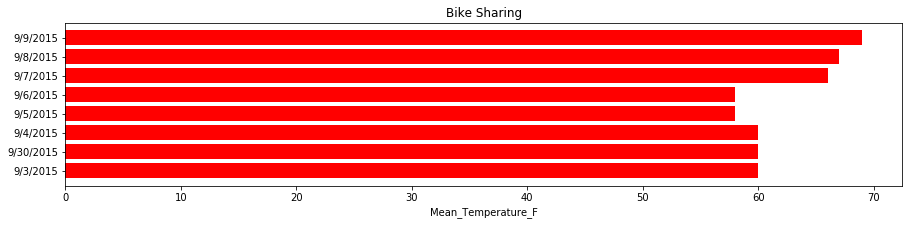

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from subprocess import check_output
stations = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/station.csv')
trips = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/trip.csv', error_bad_lines=False)

weathers = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/weather.csv')

plt.figure(figsize=(15,3))
pop= weathers.sort_values('Date', ascending=False)
plt.barh(pop['Date'].head(8),pop['Mean_Temperature_F'].head(8), align='center',
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Mean_Temperature_F")
plt.title("Bike Sharing")

Text(0.5,1,'Bike Sharing')

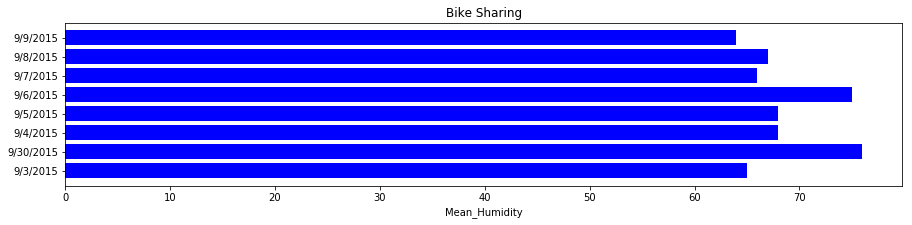

In [9]:
plt.figure(figsize=(15,3))
pop= weathers.sort_values('Date', ascending=False)
plt.barh(pop['Date'].head(8),pop['Mean_Humidity'].head(8), align='center',
        color='Blue')
plt.gca().invert_yaxis()
plt.xlabel("Mean_Humidity")
plt.title("Bike Sharing")

Text(0.5,1,'Bike Sharing')

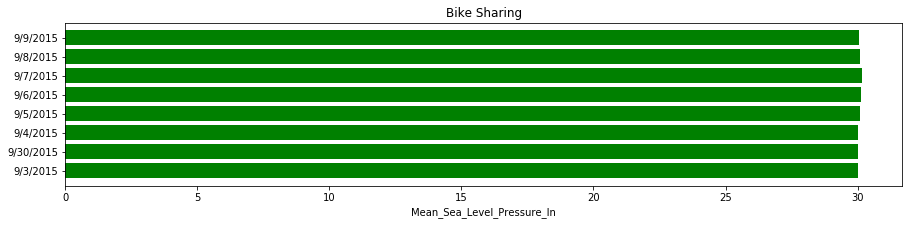

In [10]:
plt.figure(figsize=(15,3))
pop= weathers.sort_values('Date', ascending=False)
plt.barh(pop['Date'].head(8),pop['Mean_Sea_Level_Pressure_In'].head(8), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Mean_Sea_Level_Pressure_In")
plt.title("Bike Sharing")

Text(0.5,1,'Bike Sharing')

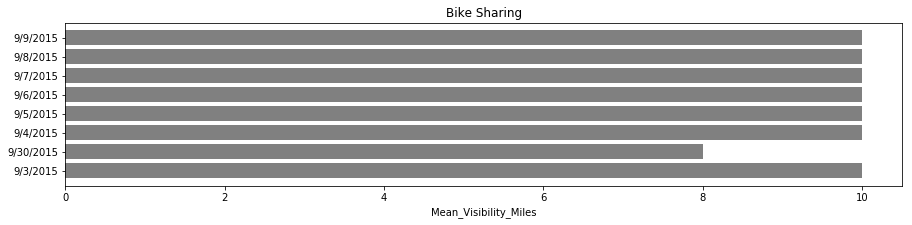

In [13]:
plt.figure(figsize=(15,3))
pop= weathers.sort_values('Date', ascending=False)
plt.barh(pop['Date'].head(8),pop['Mean_Visibility_Miles'].head(8), align='center',
        color='grey')
plt.gca().invert_yaxis()
plt.xlabel("Mean_Visibility_Miles")
plt.title("Bike Sharing")

Text(0.5,1,'Bike Sharing')

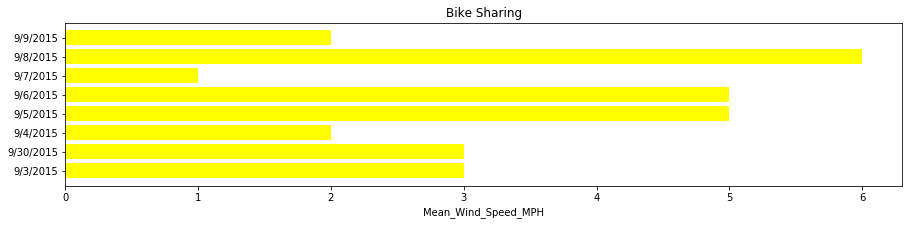

In [11]:
plt.figure(figsize=(15,3))
pop= weathers.sort_values('Date', ascending=False)
plt.barh(pop['Date'].head(8),pop['Mean_Wind_Speed_MPH'].head(8), align='center',
        color='yellow')
plt.gca().invert_yaxis()
plt.xlabel("Mean_Wind_Speed_MPH")
plt.title("Bike Sharing")